In [1]:
import os
import logging
import glob
import shutil

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

2024-05-18 03:44:47.888801: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-18 03:44:47.915708: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-18 03:44:48.349990: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/denis/Coding/projects/PUNK-Places-Recognition-Project/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_in

In [2]:
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

print("TensorFlow version: ", tf.__version__)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)
gpus

TensorFlow version:  2.16.1
1 Physical GPUs, 1 Logical GPUs


2024-05-18 03:44:49.050264: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-18 03:44:49.074165: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-18 03:44:49.074301: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

L344-L355
2024-05-18 03:44:49.131294: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-18 03:44:49.131386: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-18 03:44:49.131467: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5210 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6


In [3]:
data_path = "../data"
prep_data_path = "../prep_data"


classes = ['Desyatki',
            'Dvadcatki',
            'fizfuck',
            'himfuck',
            'matmekh',
            'pmpu',
            'Shayba'
]
num_classes = len(classes)
classes

['Desyatki', 'Dvadcatki', 'fizfuck', 'himfuck', 'matmekh', 'pmpu', 'Shayba']

In [4]:
#for cl in classes:
#    img_path = os.path.join(data_path, cl)
#    images = glob.glob(img_path + '/*.jpg')
#    print(f"{cl} : {len(images)} Images")
#    train, val, test = images[:round(len(images)*0.7)], images[round(len(images)*0.7):round(len(images)*0.85)], images[round(len(images)*0.85):]
#
#    for t in train:
#        if not os.path.exists(os.path.join(prep_data_path, 'train', cl)):
#            os.makedirs(os.path.join(prep_data_path, 'train', cl))
#        shutil.copy(t, os.path.join(prep_data_path, 'train', cl))
#
#    for v in val:
#        if not os.path.exists(os.path.join(prep_data_path, 'val', cl)):
#            os.makedirs(os.path.join(prep_data_path, 'val', cl))
#        shutil.copy(v, os.path.join(prep_data_path, 'val', cl))
#
#    for ts in train:
#        if not os.path.exists(os.path.join(prep_data_path, 'test', cl)):
#            os.makedirs(os.path.join(prep_data_path, 'test', cl))
#        shutil.copy(ts, os.path.join(prep_data_path, 'test', cl))


In [5]:
train_dir = os.path.join(prep_data_path, "train")
val_dir = os.path.join(prep_data_path, "val")
test_dir = os.path.join(prep_data_path, "test")

total_train = sum(len(os.listdir(os.path.join(train_dir, cl))) for cl in classes)
total_val = sum(len(os.listdir(os.path.join(val_dir, cl))) for cl in classes)
total_test = sum(len(os.listdir(os.path.join(test_dir, cl))) for cl in classes)


2024-05-18 03:44:49.827827: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


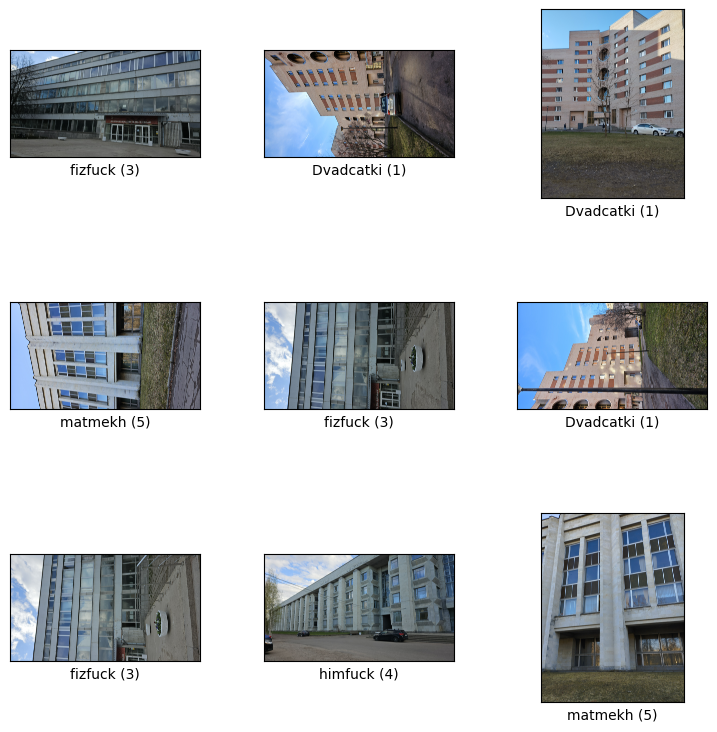

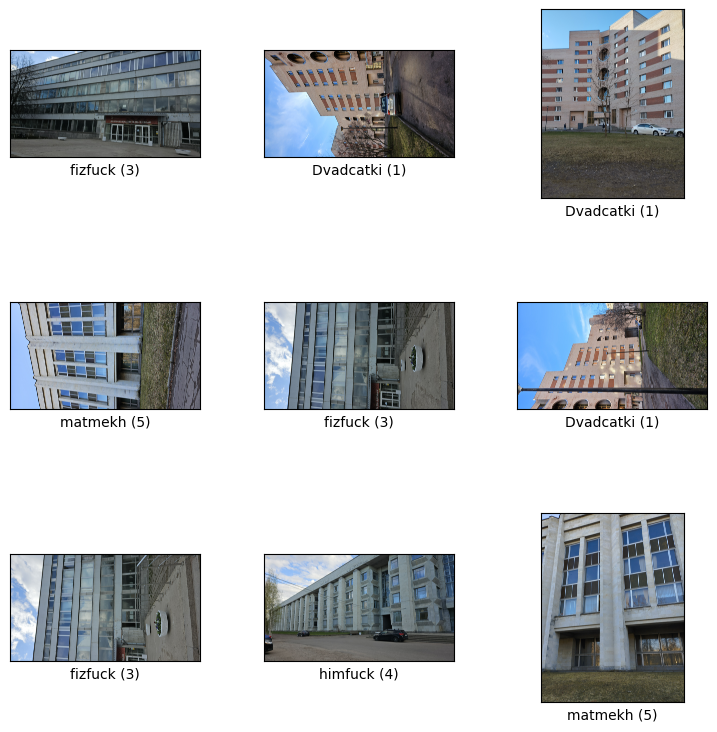

In [6]:
IMG_SHAPE = 224

builder = tfds.ImageFolder(prep_data_path, shape=(None, None, 3))

train_set = builder.as_dataset(split='train', shuffle_files=True, as_supervised=True)
val_set = builder.as_dataset(split='val', shuffle_files=True, as_supervised=True)
test_set = builder.as_dataset(split='test', as_supervised=True)
tfds.show_examples(train_set, builder.info)

In [7]:
def normalize_and_resize(image, label):
    image = tf.image.resize(image, (IMG_SHAPE, IMG_SHAPE))
    image /= 255
    return image, label

train_set = train_set.map(normalize_and_resize).cache()
val_set = val_set.map(normalize_and_resize).cache()
test_set = test_set.map(normalize_and_resize).cache()

In [8]:
data_augmentation = tf.keras.Sequential([
    layers.RandomBrightness(0.2, value_range=(0.0, 1.0)),
    layers.RandomRotation(1, fill_mode="constant", fill_value=0),
    layers.RandomZoom(0.4),
])

In [9]:
model = tf.keras.models.Sequential([
    layers.InputLayer(shape=(IMG_SHAPE,IMG_SHAPE,3)),
    layers.Conv2D(64, (5, 5), padding="same", activation='relu'),
    layers.Conv2D(64, (5, 5), padding="same", activation='relu'),
    layers.MaxPool2D((3, 3), strides=2),
    layers.BatchNormalization(),
    layers.Conv2D(128, (5, 5), padding="same", activation='relu'),
    layers.Conv2D(128, (5, 5), padding="same", activation='relu'),
    layers.MaxPool2D((3, 3), strides=2),
    layers.BatchNormalization(),
    layers.Conv2D(64, (5, 5), padding="same", activation='relu'),
    layers.Conv2D(64, (5, 5), padding="same", activation='relu'),
    layers.MaxPool2D((3, 3), strides=2),
    layers.BatchNormalization(),
    layers.Conv2D(32, (5, 5), padding="same", activation='relu'),
    layers.Conv2D(32, (5, 5), padding="same", activation='relu'),
    layers.MaxPool2D((3, 3), strides=2),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(num_classes, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 111, 111, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 111, 111, 128)  │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 111, 111, 128)  │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 55, 55, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 55, 55, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 55, 55, 64)     │       204,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 55, 55, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 27, 27, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 27, 27, 32)     │        51,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 27, 27, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,801,095 (6.87 MB)

 Trainable params: 1,800,263 (6.87 MB)

 Non-trainable params: 832 (3.25 KB)

In [11]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [12]:
checkpoint_path = "../trained_models/ckpt/checkpoint.model.keras"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_best_only=True, verbose=1)

In [13]:
BATCH_SIZE = 48
EPOCHS = 80

train_set = train_set.shuffle(total_train, reshuffle_each_iteration=True).repeat().map(lambda x, y: (data_augmentation(x, training=True), y)).batch(BATCH_SIZE)
val_set = val_set.shuffle(total_val).repeat().batch(BATCH_SIZE)

history = model.fit(
    train_set, validation_data=val_set, batch_size=BATCH_SIZE,
    epochs=EPOCHS, steps_per_epoch=int(total_train/BATCH_SIZE), validation_steps=int(total_val/BATCH_SIZE), callbacks=[cp_callback]
)

Epoch 1/80


I0000 00:00:1715993105.460666   61989 service.cc:145] XLA service 0x70873011eda0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715993105.460685   61989 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2024-05-18 03:45:05.507673: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-18 03:45:05.722192: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8902
2024-05-18 03:45:07.042950: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.44GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-05-18 03:45:10.354706: W external/local_tsl/tsl/framework/bfc_allocator.cc:368]

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.3608 - loss: 1.9413

2024-05-18 03:46:23.312185: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 28901760 bytes after encountering the first element of size 28901760 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size



Epoch 1: val_loss improved from inf to 9.40450, saving model to ../trained_models/ckpt/checkpoint.model.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 87s 398ms/step - accuracy: 0.3630 - loss: 1.9306 - val_accuracy: 0.1302 - val_loss: 9.4045
Epoch 2/80
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.6414 - loss: 0.9468
Epoch 2: val_loss improved from 9.40450 to 7.54296, saving model to ../trained_models/ckpt/checkpoint.model.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 354ms/step - accuracy: 0.6416 - loss: 0.9458 - val_accuracy: 0.2812 - val_loss: 7.5430
Epoch 3/80
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - accuracy: 0.6727 - loss: 0.8176
Epoch 3: val_loss improved from 7.54296 to 4.55370, saving model to ../trained_models/ckpt/checkpoint.model.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 354ms/step - accuracy: 0.6735 - loss: 0.8164 - val_accuracy: 0.2344 - val_loss: 4.5537
Epoch 4/80
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.7771 - loss: 0.5700
Epoch 4: val_loss improved from 4.55370 to 3.8364

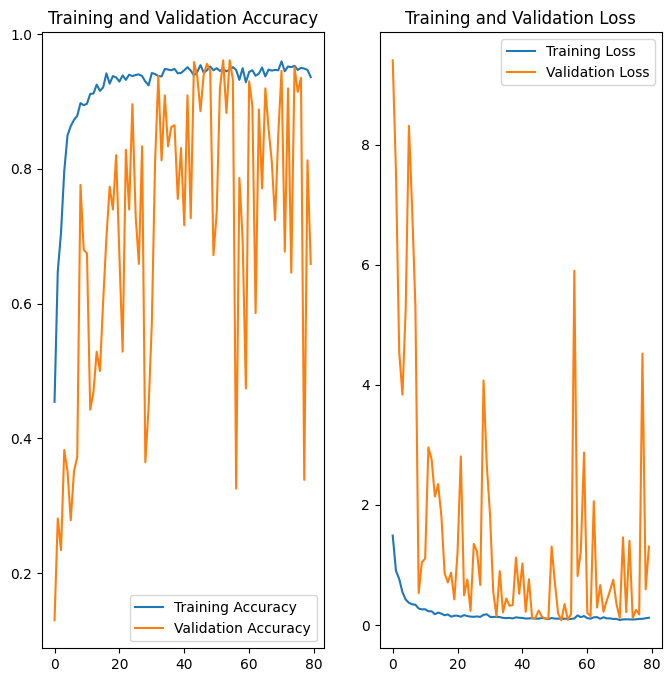

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
model.load_weights(checkpoint_path)

test_set = test_set.cache().repeat(5).batch(32)

results = model.evaluate(test_set, batch_size=32)

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

In [17]:
model.load_weights(checkpoint_path)
results = model.evaluate(test_set, batch_size=32)

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None